## Image Classifier Model

In [3]:
import os, cv2, imghdr, glob
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from PIL import Image, ImageDraw, ImageFont

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
# check gpus:
#gpus = tf.config.experimental.list_physical_devices('GPU')
#gpus
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
#This TensorFlow function lists all physical GPU devices that are available on the system:
#tf.config.list_physical_devices('GPU')

### 1. Data

In [6]:
data_dir = 'data'
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir):
    #looping every single image: 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

-space-cosmos-background-beautiful-abstract-illustration-art-dust-free-photo.jpg
01-ref-galaxy-27403698983_e4b085480f_o_orig.jpg
02f2649eaa7743a8e0a117c3e0a386ee.jpg
1.jpg
1000_F_379592097_x0RFlWjb3cepq85DN1ebZnaYPN8xbg1P.jpg
1000_F_437745959_kKwTklHvp6EpywvPBR42NOEywLfCihNJ.jpg
1000_F_437998076_FMbYeNbpcTJvBVOVqSyuJWZQXahvdMai.jpg
1000_F_444882679_e6vCRFf3dusBJCmy2w5cNZeNdOn8uQvp.jpg
1000_F_559109156_eTiQv2Y4S89eJlXAc5PjP3U2MqJ4YM7T.jpg
1000_F_92216615_bLySNjZrHZGBvf01vwTEBr5kYn9b2T3T.jpg
1086_2x1.jpg
112964-universe-cosmos-space-sky-galaxy-2560x1440.jpg
1133668.jpg
1200px-M31_09-01-2011_28cropped29.jpg
126359-spiral-galaxy-milky-way-solar-system-nasa-spitzer-space-telescope-4k.jpg
1279329.jpg
12webb-live-stephans-quintet-videoSixteenByNine3000.jpg
141540719843e9758d4703a767a6d4cd.jpg
1440x810_cmsv2_4ab92b2e-f2d4-503a-9e8a-c47734d6eed5-6910378.jpg
158821.jpg
1858886.jpg
19677.jpg
1da3af61bda9ec258107188951967a9d.jpg
2026-galaxy__hd_galaxy_wallpaper_4k.jpg
202f62dde03a6f6f9844f54e30248

In [8]:
img = cv2.imread(os.path.join('data', 'sky', 'sunset-on-sky-free-photo.jpg'))
#type(img)
#numpy.ndarray

In [9]:
#img.shape
#img --> (high, width, color chanals)

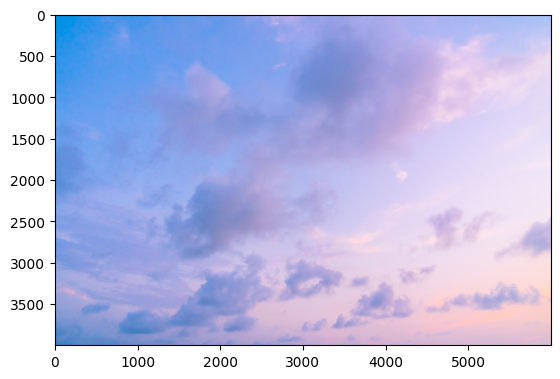

In [10]:
#show the RGB image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [11]:
#The is used to iterate through a directory and its subdirectories, checking the image files for valid extensions.
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [12]:
# tf.data.Dataset??  # "??" information about this method
# tf.keras.utils.image_dataset_from_directory??
# "??" - information

In [13]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 568 files belonging to 2 classes.


In [14]:
data_iterator = data.as_numpy_iterator()

In [15]:
batch = data_iterator.next()

### 2. Images_as_Numpy_Arrays

In [16]:
# batch[0].shape
# batch[1]

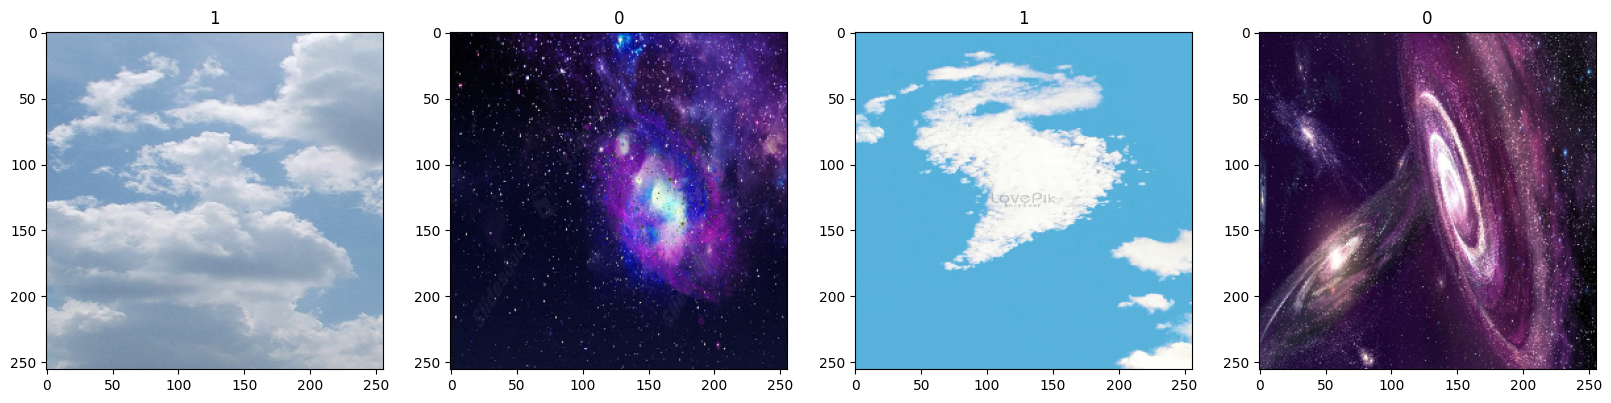

In [17]:
# The is used to display four image samples from a batch of data.
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [18]:
# 1 = SKY
# 0 = GALAXY

In [19]:
#scale data
data = data.map(lambda x,y: (x/255, y))

In [20]:
# tf.data api - check
# batch[0].max() --> 1.0
# batch[0].min() --> 0.0

In [21]:
data.as_numpy_iterator().next()

(array([[[[0.1463848 , 0.1346201 , 0.3189338 ],
          [0.15700062, 0.14280024, 0.32792586],
          [0.15719976, 0.13417585, 0.32224265],
          ...,
          [0.09168199, 0.1152114 , 0.31128982],
          [0.0836397 , 0.10716911, 0.30324754],
          [0.07450981, 0.09803922, 0.29411766]],
 
         [[0.1743413 , 0.14676777, 0.33702514],
          [0.1653033 , 0.14471507, 0.33196998],
          [0.15284927, 0.1426011 , 0.32691482],
          ...,
          [0.09411765, 0.11764706, 0.3137255 ],
          [0.0819087 , 0.10543811, 0.30151653],
          [0.08939951, 0.11292892, 0.30900735]],
 
         [[0.1546109 , 0.14345895, 0.3288756 ],
          [0.15260416, 0.13959865, 0.32432598],
          [0.1481924 , 0.1368413 , 0.321155  ],
          ...,
          [0.10240503, 0.12593444, 0.32201287],
          [0.0910386 , 0.11456802, 0.31064644],
          [0.08999693, 0.11352635, 0.3096048 ]],
 
         ...,
 
         [[0.04036458, 0.06946997, 0.27958027],
          [0.02789

### 3. Split_data

In [22]:
#len(data) -->7?
train_size = int(len(data)*.7) #what is used to train Deep Model
val_size = int(len(data)*.2) #+1 #what is valuate Model while we train
test_size = int(len(data)*.1) #+1 #post train
#train_size+val_size+test_size  --> == len(data)

In [23]:
train_size

12

In [24]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [25]:
train
#len(test) -->1?

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

### 4. Deep_model

In [26]:
model = Sequential()

In [27]:
#This code defines a convolutional neural network (CNN) for image classification.
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [28]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [29]:
# Adam - tf.optimizers. ...

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

### 5. Train

In [31]:
# make log deir
logdir='logs'

In [32]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [33]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
12/12 [==============================] - 42s 3s/step - loss: 0.4919 - accuracy: 0.7760 - val_loss: 0.0873 - val_accuracy: 0.9688
Epoch 2/20
12/12 [==============================] - 44s 3s/step - loss: 0.0427 - accuracy: 0.9896 - val_loss: 0.0611 - val_accuracy: 0.9896
Epoch 3/20
12/12 [==============================] - 41s 3s/step - loss: 0.0159 - accuracy: 0.9948 - val_loss: 0.0153 - val_accuracy: 0.9896
Epoch 4/20
12/12 [==============================] - 40s 3s/step - loss: 0.0061 - accuracy: 0.9974 - val_loss: 0.0195 - val_accuracy: 0.9896
Epoch 5/20
12/12 [==============================] - 40s 3s/step - loss: 0.0048 - accuracy: 0.9974 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 6/20
12/12 [==============================] - 42s 3s/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 7/20
12/12 [==============================] - 40s 3s/step - loss: 0.0215 - accuracy: 0.9922 - val_loss: 0.0324 - val_accuracy: 0.9896
Epoch 8/20
12/12 [==

In [34]:
hist

In [35]:
hist.history

{'loss': [0.49189087748527527,
  0.04266245663166046,
  0.015865806490182877,
  0.006136488169431686,
  0.0047984193079173565,
  0.002480692695826292,
  0.02145194076001644,
  0.0037785677704960108,
  0.0016521663637831807,
  0.0037671232130378485,
  0.00138925202190876,
  6.391733040800318e-05,
  0.0011969032930210233,
  9.965871140593663e-05,
  0.00021347898291423917,
  0.00020081423281226307,
  7.999409717740491e-05,
  3.821702193818055e-05,
  6.796900561312214e-05,
  5.7904482673620805e-05],
 'accuracy': [0.7760416865348816,
  0.9895833134651184,
  0.9947916865348816,
  0.9973958134651184,
  0.9973958134651184,
  1.0,
  0.9921875,
  0.9973958134651184,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.08732862025499344,
  0.061050597578287125,
  0.015333452261984348,
  0.01948116347193718,
  0.001017546164803207,
  0.007191766053438187,
  0.032399050891399384,
  0.00037343226722441614,
  0.006261229515075684,
  0.001730307820253074

### 6. Plot_performance

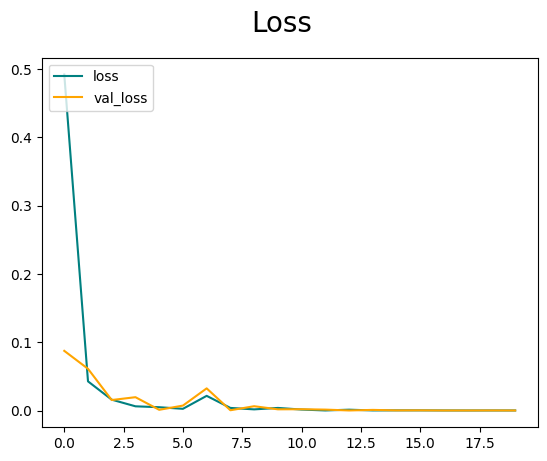

In [36]:
# MORE DATA NEEDED !

fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show() 

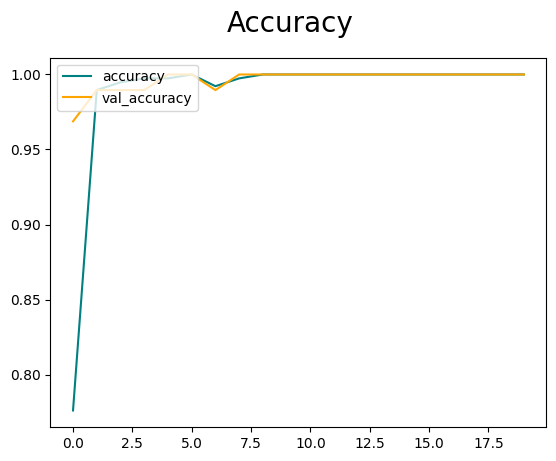

In [37]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [38]:
# pre = Precision()
# re = Recall()
# acc = BinaryAccuracy()

In [39]:
# for batch in test.as_numpy_iterator(): 
#     X, y = batch
#     yhat = model.predict(X)
#     pre.update_state(y, yhat)
#     re.update_state(y, yhat)
#     acc.update_state(y, yhat)

In [40]:
# print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accurancy:{acc.result().numpy()}')      
# print(pre.result(), re.result(), acc.result())

### 7. Test

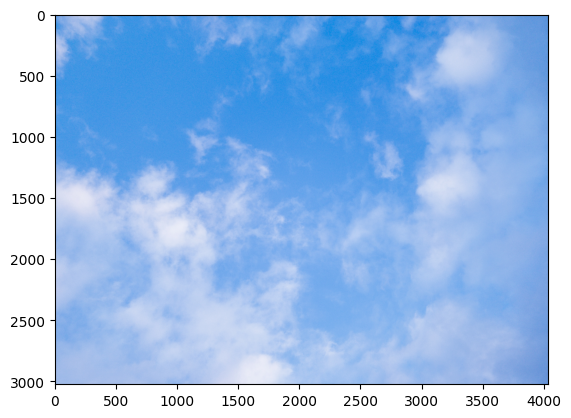

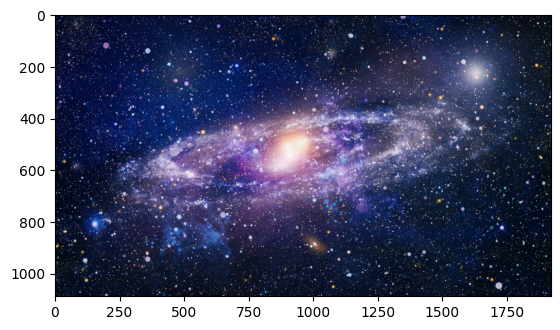

In [41]:
img_path = 'edited_data/test_1.jpg'
img_sky = mpimg.imread(img_path)
plt.imshow(img_sky)
plt.show()

img_path = 'edited_data/test_2.jpg'
img_gal = mpimg.imread(img_path)
plt.imshow(img_gal)
plt.show()

In [42]:
img_sky=Image.open('edited_data/test_1.jpg')
img_gal=Image.open('edited_data/test_2.jpg')

In [43]:
img_sky = img_sky.resize((256,256))
img_gal = img_gal.resize((256,256))

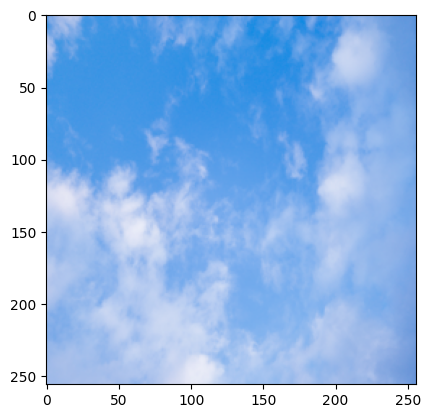

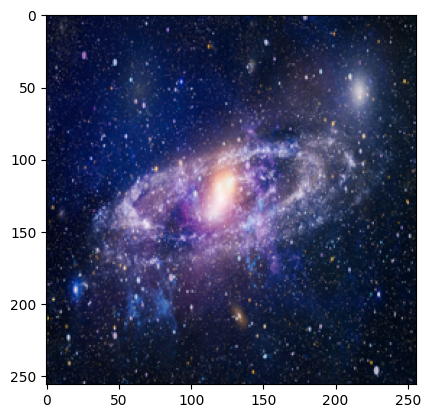

In [44]:
plt.imshow(img_sky)
plt.show()

plt.imshow(img_gal)
plt.show()

In [45]:
img_yhat_1 = model.predict(np.expand_dims(img_sky,axis=0))
img_yhat_2 = model.predict(np.expand_dims(img_gal,axis=0))

1/1 [==============================] - 0s 36ms/step


In [46]:
img_yhat_1

array([[1.]], dtype=float32)

In [47]:
img_yhat_2

array([[0.]], dtype=float32)

### 8. Print_prediction

In [48]:
if img_yhat_1 > 0.5:
    print("SKY")  
else:
    print("NOT sky")
    
if img_yhat_2 < 0.5:
    print("GALAXY")  
else:
    print("NOT gal")

SKY
GALAXY


### 9. Save_model

In [49]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','img_classifier.h5'))

## Edit_predicted_images

In [68]:
IMG_EDIT_1 = 'edited_data/test_1.jpg'
IMG_EDIT_2 = 'edited_data/test_2.jpg'
size = 2048, 2048

def add_text_i(im, text, topleft, size, colour):
    font = ImageFont.truetype("Ballet Harmony.ttf", size)
    draw = ImageDraw.Draw(im)
    draw.text(topleft, text, font=font, fill=colour)
    return im


def add_text_sky():
    with Image.open(IMG_EDIT_1) as im:
        im = add_text_i(im, "This is the Sky", (100, 100), 250, (0, 0, 0))
        im.save('edited_data/this-is-the-sky.jpg')

        
def add_text_galaxy():
    with Image.open(IMG_EDIT_2) as im:
        im = add_text_i(im, "This is a Galaxy", (100, 100), 250, (250, 250, 250))
        im.save('edited_data/this-is-a-galaxy.jpg')
        
        
if img_yhat_1 > 0.5:
    add_text_sky()
if img_yhat_2 < 0.5:
    add_text_galaxy()
else:
    print(f'Image is NOT predicted')